In [137]:
import matplotlib.pyplot as plt
import numpy as np

In [138]:
x = np.linspace(0, 10, 10)
y = x**2

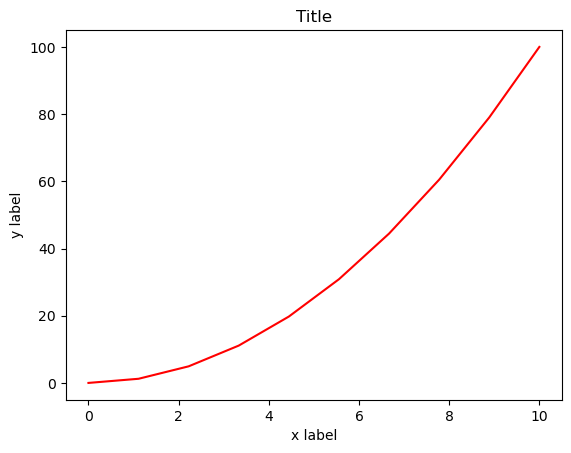

In [139]:
#functional
plt.plot(x, y, 'r-')
plt.xlabel('x label')
plt.ylabel('y label')
plt.title('Title')
plt.show()

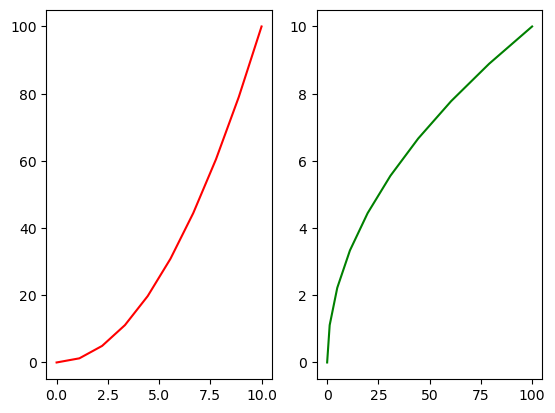

In [140]:
# plt.subplot(row, column, graph1)
plt.subplot(1, 2, 1)
plt.plot(x, y, 'r')

plt.subplot(1, 2, 2)
plt.plot(y, x, 'g')

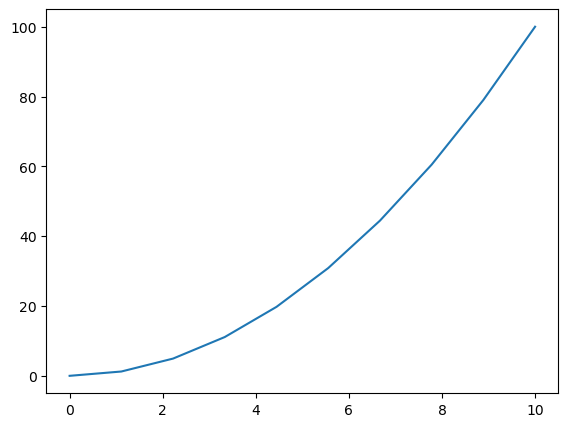

In [141]:
fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])
axes.plot(x, y)

# Machine Learning

In [142]:
# from sklearn.family import Model
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [143]:
data = pd.read_csv('Salary Data.csv')

In [144]:
data.head()

,Experience Years,Salary
0,1.1,39343
1,1.2,42774
2,1.3,46205
3,1.5,37731
4,2.0,43525


In [145]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Experience Years  40 non-null     float64
 1   Salary            40 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 772.0 bytes


In [146]:
data.describe()

,Experience Years,Salary
count,40.000000,40.000000
mean,5.152500,74743.625000
std,2.663715,25947.122885
min,1.100000,37731.000000
25%,3.200000,56878.250000
50%,4.600000,64472.500000
75%,6.875000,95023.250000
max,10.500000,122391.000000


In [147]:
data.isnull().sum()

Experience Years    0
Salary              0
dtype: int64

In [148]:
data.isna().sum()

Experience Years    0
Salary              0
dtype: int64

In [149]:
data[data.duplicated()]

,Experience Years,Salary


In [150]:
data.columns

Index(['Experience Years', 'Salary'], dtype='object')

<Axes: >

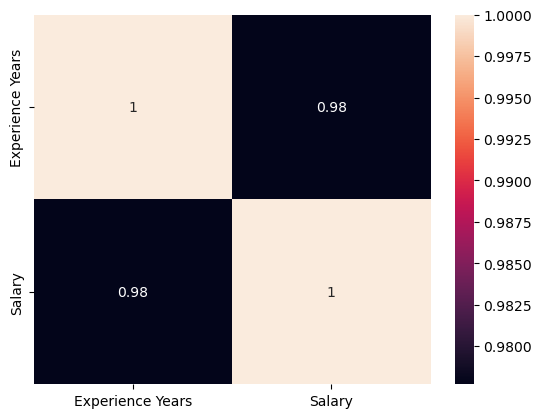

In [152]:
sns.heatmap(data.corr(), annot=True)

In [153]:
data.columns

Index(['Experience Years', 'Salary'], dtype='object')

In [154]:
x = data[['Experience Years']]
y = data['Salary']

In [155]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=101)

In [156]:
from sklearn.linear_model import LinearRegression

In [157]:
lm = LinearRegression()

In [158]:
lm.fit(X_train, y_train)

LinearRegression()

In [159]:
lm.coef_

array([9254.54992096])

In [160]:
cfc = pd.DataFrame(data=lm.coef_, index=x.columns, columns=['Coefficient'])

In [161]:
cfc

,Coefficient
Experience Years,9254.549921


In [162]:
# one unit of any index leads to increase in Coefficient price in the house

In [163]:
predictions = lm.predict(X_test)

In [164]:
predictions

array([ 65987.91611942,  63211.55114313, 114111.57570841,  80795.19599295,
        81720.65098505,  91900.6558981 ,  69689.7360878 ,  37298.81136444,
       102080.66081116,  83571.56096924,  53031.54623007, 106707.93577164])

In [165]:
y_test

18     59095
16     56957
36    116969
25     81363
26     93940
30     98273
20     64500
1      42774
32    113812
27     91000
7      56642
34    109431
Name: Salary, dtype: int64

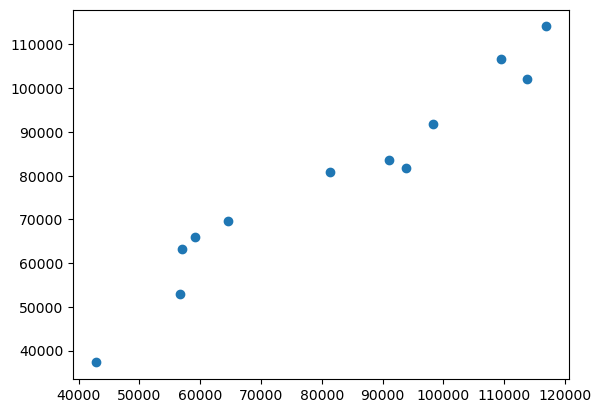

In [166]:
plt.scatter(y_test, predictions)

C:\Users\Raman\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


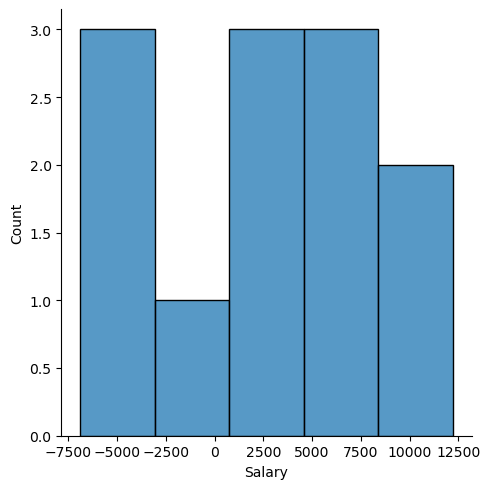

In [167]:
sns.displot((y_test-predictions))